In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from networkx.algorithms import community,k_components
import random

In [2]:
Types = {'electrique': 1000, 'thermique':2424}

Types_vitesseslimit = {'electrique': 200, 'thermique':150}

Types_perc = {'electrique': 0.5, 'thermique':0.5}

In [3]:
def matrice_ville(i,j):
    return [[0 for x in range(i)] for y in range(j)] 

In [4]:
ville_1m = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] ,
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1] ,
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]] 

In [5]:
ville_1m


[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
 [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]]

In [6]:
def ville_graphe(ville_m,i,lenmin,lenmax):
    ville_graph = nx.Graph()
    ville_graph.add_nodes_from(range(i))
    ville_graph.add_edges_from([(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1])
    for k in range(i-1):
        L= [(x,y) for x in range(i) for y in range(i) if ville_m[x][y]==1]
        for a,b in L : 
             ville_graph.add_edge(a,b, len = random.randint(lenmin,lenmax))
    pos = nx.spring_layout(ville_graph)
    nx.draw_networkx_edges(ville_graph,pos,edgelist=None, width=1.0, edge_color='k', style='solid', alpha=None, arrowstyle='-|>', arrowsize=10, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None, node_size=300, nodelist=None, node_shape='o', connectionstyle='arc3', min_source_margin=0, min_target_margin=0)
    nx.draw_networkx_edge_labels(ville_graph, pos)
    nx.draw(ville_graph, pos, with_labels=True)
    return ville_graph


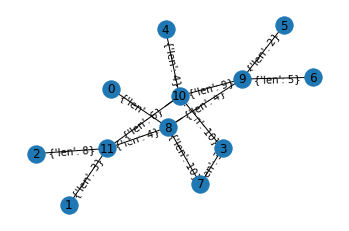

In [7]:
ville_1g = ville_graphe(ville_1m,12,2,10)

In [8]:
def random_position(len_ville_1m):
    depart = random.randint(0,len_ville_1m -1)
    arrivee = random.randint(0,len_ville_1m -1)
    
    while(depart == arrivee):
        arrivee = random.randint(0,len_ville_1m -1)
    return (depart, arrivee)
    

In [36]:
class Voiture:
    nbr_voiture = 0
    def __init__(self,typee,positiondepart,positionarrivé,positionactuelle,vitesse,vitesse_max,villeg):
        self.type = typee
        self.speed = vitesse 
        """position est un tuple d'un tuple de position et d'un pourcentage """
        self.position = positionactuelle
        self.positiondepart = positiondepart
        self.positionarrivé = positionarrivé
        self.vitesse_max =vitesse_max
        "chemin le plus cours a"
        self.chemin = nx.shortest_path(villeg, source=positiondepart, target=positionarrivé, weight='len', method='dijkstra')
        Voiture.nbr_voiture += 1
    def spawn(typesperc,nbr,villem,villeg):
        system=[]
        len_ville_1m = len(villem)
        for i in range(round(nbr*typesperc['electrique'])):
            
            pos = random_position(len_ville_1m)
            depart = pos[0]
            arrivee = pos[1]
            
            
            a = nx.shortest_path(villeg, source=depart, target=arrivee, weight='len', method='dijkstra')
            
            system.append("voiture"+str(i+1))
            system[i]= Voiture('electrique',depart,arrivee,((depart,a[1]),0.0),50,Types_vitesseslimit['electrique'],villeg)
        
        for j in range(round(nbr*typesperc['thermique']), nbr):
            
            pos = random_position(len_ville_1m)
            depart = pos[0]
            arrivee = pos[1]
            
            b = nx.shortest_path(villeg, source=depart, target=arrivee, weight='len', method='dijkstra')
        
            system.append("voiture"+str(j+1))
            system[j]= Voiture('thermique',depart,arrivee,((depart,b[1]),0.0),50,Types_vitesseslimit['thermique'],villeg)
        return system


In [37]:


v1 = Voiture("thermique",0,0,0,0,130,ville_1g)
print("le type de voiture de v1 est {}".format(v1.type))
v2 = Voiture("Electrique",0,0,0,0,150,ville_1g)
print("v2 est de type {}".format(v2.type))
v=Voiture.spawn(Types_perc,6,ville_1m,ville_1g)
for i in range(6):
    print(format(v[i].type),format(v[i].vitesse_max),format(v[i].speed),format(v[i].position),format(v[i].positiondepart),format(v[i].positionarrivé))

le type de voiture de v1 est thermique
v2 est de type Electrique
electrique 200 50 ((8, 9), 0.0) 8 6
electrique 200 50 ((2, 11), 0.0) 2 7
electrique 200 50 ((7, 3), 0.0) 7 10
thermique 150 50 ((3, 7), 0.0) 3 8
thermique 150 50 ((9, 8), 0.0) 9 8
thermique 150 50 ((6, 9), 0.0) 6 0


In [11]:
jj = nx.shortest_path(ville_1g, source=5, target=1, weight='len', method='dijkstra')

In [12]:
5/36

0.1388888888888889

In [13]:
length = nx.get_edge_attributes(ville_1g,'len')
length

{(0, 8): 4,
 (1, 11): 3,
 (2, 11): 8,
 (3, 7): 3,
 (3, 10): 10,
 (4, 10): 4,
 (5, 9): 2,
 (6, 9): 5,
 (7, 8): 10,
 (8, 9): 4,
 (8, 11): 4,
 (9, 10): 9,
 (10, 11): 6}

In [14]:
nn = nx.all_shortest_paths(ville_1g, source=5, target=1, weight=None, method='dijkstra')
l=[]
for i in nn:
    l.append(i)
l

[[5, 9, 8, 11, 1], [5, 9, 10, 11, 1]]

In [15]:
nx.shortest_path_length(ville_1g, source=5, target=1, weight='len', method='dijkstra')

13

In [16]:
def liste2tuple(chemin):
    chemine = []
    for i in range(len(chemin)-1):
        chemine.append((chemin[i],chemin[i+1]))
    return chemine
        
    
    
    

In [17]:
liste2tuple(jj)

[(5, 9), (9, 8), (8, 11), (11, 1)]

In [18]:
nx.get_edge_attributes(ville_1g,'len')

{(0, 8): 4,
 (1, 11): 3,
 (2, 11): 8,
 (3, 7): 3,
 (3, 10): 10,
 (4, 10): 4,
 (5, 9): 2,
 (6, 9): 5,
 (7, 8): 10,
 (8, 9): 4,
 (8, 11): 4,
 (9, 10): 9,
 (10, 11): 6}

In [19]:
def change_entre_node(voiture):
    """change la valeur du tuple dans le tuple position qui définit la position entre les nodes où se trouve
    le véhicule quand un vehicule change de route 
                                                    note:ne prend pas en compte le sens des routes """
    """ Qu'ai je besoin ? 1) D'une liste qui me prend le chemin que prend le vehicule afin de recupérer les nodes 
    que le vehicule va pouvoir prendre .
    2) D'un compteur pour parcourir la liste .
    3) D'un tuple qui va prendre la valeur du nouveau chemin afin de la remplacer dans notre voiture"""
    chemin_court=voiture.chemin
    i=0
    get=voiture.position[0][0]
    svg=()
    for i in range(len(chemin_court)-2):
        if(chemin_court[i]==get):
            voiture.position=((chemin_court[i+1],chemin_court[i+2]),voiture.position[1])
            print(voiture.position[0])

In [20]:
def indice_chemin(chemin , tuplee):
    for i in range(len(chemin)-1):
        if chemin[i]==tuplee:
            return i
    return 0 

In [21]:
indice_chemin(liste2tuple(jj),(8,11))

2

In [22]:
def donne_longueur(t1):
    taille = nx.get_edge_attributes(ville_1g,'len')
    for (t2,l) in taille.items():
        if((t1[0]==t2[0]) and (t1[1]==t2[1])) or ((t1[0]==t2[1] )and (t1[1]==t2[0])) :
            return l
    return -1 

In [23]:
donne_longueur((9,6))

5

In [39]:
def change_distance(voiture,verbose=True):
    """Fonction qui a pour but de faire évoluer la vitesse d'une voiture 
    toute le 10 sec """
    chemine = voiture.chemin
    chemin = liste2tuple(chemine)
    
    distance_parcouru =(voiture.speed*10)/3600
    if verbose==True:
        print(voiture.position[0])
    if voiture.position[1]+(distance_parcouru*100)/donne_longueur(voiture.position[0]) > 100:
        if voiture.position[0][1]== voiture.positionarrivé:
            voiture.speed=0
            voiture.position=(voiture.position[0],100)
        else:
            if verbose:
                print(chemin[indice_chemin(chemin,voiture.position[0])])
                print(voiture.position[0])
            voiture.position = (chemin[indice_chemin(chemin,voiture.position[0]) + 1],0)
        
    
    if voiture.position[1]<100 and voiture.speed!= 0:
        voiture.position = (voiture.position[0],voiture.position[1]+(distance_parcouru*100)/donne_longueur(voiture.position[0]))
    
    

In [58]:
popu = Voiture.spawn(Types_perc,6,ville_1m,ville_1g)
#print(popu[0].speed)
print(popu[0].chemin)
print(popu[1].chemin)


for i in range(150):
    for v in popu[0:2]:
        change_distance(v)
        print("pourcentage = " + str(v.position[1])+" tuple pos = " + str(v.position[0]) ) 
    

[10, 9, 5]
[1, 11, 10, 3]
(10, 9)
pourcentage = 1.5432098765432098 tuple pos = (10, 9)
(1, 11)
pourcentage = 4.62962962962963 tuple pos = (1, 11)
(10, 9)
pourcentage = 3.0864197530864197 tuple pos = (10, 9)
(1, 11)
pourcentage = 9.25925925925926 tuple pos = (1, 11)
(10, 9)
pourcentage = 4.62962962962963 tuple pos = (10, 9)
(1, 11)
pourcentage = 13.88888888888889 tuple pos = (1, 11)
(10, 9)
pourcentage = 6.172839506172839 tuple pos = (10, 9)
(1, 11)
pourcentage = 18.51851851851852 tuple pos = (1, 11)
(10, 9)
pourcentage = 7.716049382716049 tuple pos = (10, 9)
(1, 11)
pourcentage = 23.14814814814815 tuple pos = (1, 11)
(10, 9)
pourcentage = 9.25925925925926 tuple pos = (10, 9)
(1, 11)
pourcentage = 27.77777777777778 tuple pos = (1, 11)
(10, 9)
pourcentage = 10.80246913580247 tuple pos = (10, 9)
(1, 11)
pourcentage = 32.407407407407405 tuple pos = (1, 11)
(10, 9)
pourcentage = 12.34567901234568 tuple pos = (10, 9)
(1, 11)
pourcentage = 37.03703703703704 tuple pos = (1, 11)
(10, 9)
pourcen

In [105]:
def simulation(nbrvoiture,ville,villeg,lenmin,lenmax,verbose=True):
    dictroute=nx.get_edge_attributes(villeg,'len')
    popu = Voiture.spawn(Types_perc,nbrvoiture,ville,villeg)
    restant = []
    if verbose==True:
        print(dictroute)
        for j in popu:
            print(j.chemin)
    for i in range(1000):
        for v in range(len(popu)):
            change_distance(popu[v])
            if popu[v].position[1]==100 and popu[v].position[0][1]== popu[v].positionarrivé and popu[v] not in restant:
                restant.append(popu[v])
            if verbose:
                print("pourcentage = "+ str(popu[v].position[1]))
                print(" tuple pos = "+str(popu[v].position[0]))
       
        if len(restant)==nbrvoiture:
            break 
    
    

In [106]:

simulation(2,ville_1m,ville_1g,2,10,True)

{(0, 8): 4, (1, 11): 3, (2, 11): 8, (3, 7): 3, (3, 10): 10, (4, 10): 4, (5, 9): 2, (6, 9): 5, (7, 8): 10, (8, 9): 4, (8, 11): 4, (9, 10): 9, (10, 11): 6}
[0, 8, 7]
[10, 3, 7]
(0, 8)
pourcentage = 3.4722222222222223
 tuple pos = (0, 8)
(10, 3)
pourcentage = 1.3888888888888888
 tuple pos = (10, 3)
(0, 8)
pourcentage = 6.944444444444445
 tuple pos = (0, 8)
(10, 3)
pourcentage = 2.7777777777777777
 tuple pos = (10, 3)
(0, 8)
pourcentage = 10.416666666666668
 tuple pos = (0, 8)
(10, 3)
pourcentage = 4.166666666666666
 tuple pos = (10, 3)
(0, 8)
pourcentage = 13.88888888888889
 tuple pos = (0, 8)
(10, 3)
pourcentage = 5.555555555555555
 tuple pos = (10, 3)
(0, 8)
pourcentage = 17.36111111111111
 tuple pos = (0, 8)
(10, 3)
pourcentage = 6.944444444444445
 tuple pos = (10, 3)
(0, 8)
pourcentage = 20.833333333333332
 tuple pos = (0, 8)
(10, 3)
pourcentage = 8.333333333333334
 tuple pos = (10, 3)
(0, 8)
pourcentage = 24.305555555555554
 tuple pos = (0, 8)
(10, 3)
pourcentage = 9.722222222222223
